Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7363
Epoch 10, Loss: 0.6567
Epoch 20, Loss: 0.6324
Epoch 30, Loss: 0.6056
Epoch 40, Loss: 0.5778
Epoch 50, Loss: 0.5511
Epoch 60, Loss: 0.5274
Epoch 70, Loss: 0.5076
Epoch 80, Loss: 0.4916
Epoch 90, Loss: 0.4788
Epoch 100, Loss: 0.4687
Epoch 110, Loss: 0.4605
Epoch 120, Loss: 0.4536
Epoch 130, Loss: 0.4478
Epoch 140, Loss: 0.4427
Epoch 150, Loss: 0.4380
Epoch 160, Loss: 0.4335
Epoch 170, Loss: 0.4292
Epoch 180, Loss: 0.4249
Epoch 190, Loss: 0.4206
Epoch 200, Loss: 0.4161
Epoch 210, Loss: 0.4113
Epoch 220, Loss: 0.4064
Epoch 230, Loss: 0.4010
Epoch 240, Loss: 0.3953
Epoch 250, Loss: 0.3892
Epoch 260, Loss: 0.3824
Epoch 270, Loss: 0.3751
Epoch 280, Loss: 0.3670
Epoch 290, Loss: 0.3581
Epoch 300, Loss: 0.3485
Epoch 310, Loss: 0.3383
Epoch 320, Loss: 0.3277
Epoch 330, Loss: 0.3170
Epoch 340, Loss: 0.3064
Epoch 350, Loss: 0.2959
Epoch 360, Loss: 

<Axes: >

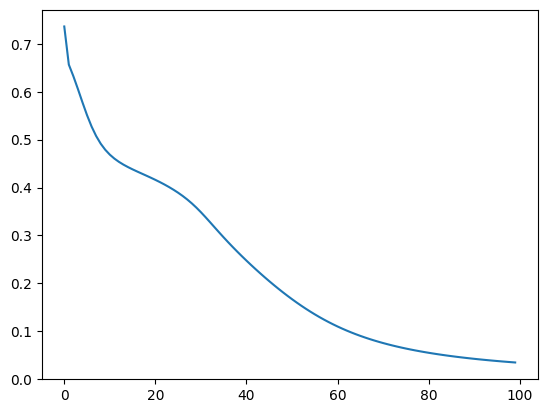

In [38]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

loss_history = []

input_size = X_train.shape[1]
hidden_size = 10  # Number of neurons in hidden layer
output_size = y_train.shape[1]
learning_rate = 0.6
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2
    
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    epsilon = 1e-8  # small value to avoid division by zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip predictions to avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    loss_history.append(loss)
    return loss


for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)
    
    if epoch % 10 == 0:
        loss = binary_crossentropy_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2698
Epoch 10, Loss: 0.2445
Epoch 20, Loss: 0.2394
Epoch 30, Loss: 0.2370
Epoch 40, Loss: 0.2350
Epoch 50, Loss: 0.2329
Epoch 60, Loss: 0.2308
Epoch 70, Loss: 0.2286
Epoch 80, Loss: 0.2265
Epoch 90, Loss: 0.2243
Epoch 100, Loss: 0.2220
Epoch 110, Loss: 0.2197
Epoch 120, Loss: 0.2174
Epoch 130, Loss: 0.2151
Epoch 140, Loss: 0.2128
Epoch 150, Loss: 0.2104
Epoch 160, Loss: 0.2081
Epoch 170, Loss: 0.2057
Epoch 180, Loss: 0.2034
Epoch 190, Loss: 0.2010
Epoch 200, Loss: 0.1988
Epoch 210, Loss: 0.1965
Epoch 220, Loss: 0.1943
Epoch 230, Loss: 0.1921
Epoch 240, Loss: 0.1900
Epoch 250, Loss: 0.1880
Epoch 260, Loss: 0.1860
Epoch 270, Loss: 0.1841
Epoch 280, Loss: 0.1822
Epoch 290, Loss: 0.1804
Epoch 300, Loss: 0.1787
Epoch 310, Loss: 0.1770
Epoch 320, Loss: 0.1754
Epoch 330, Loss: 0.1739
Epoch 340, Loss: 0.1725
Epoch 350, Loss: 0.1711
Epoch 360, Loss: 

<Axes: >

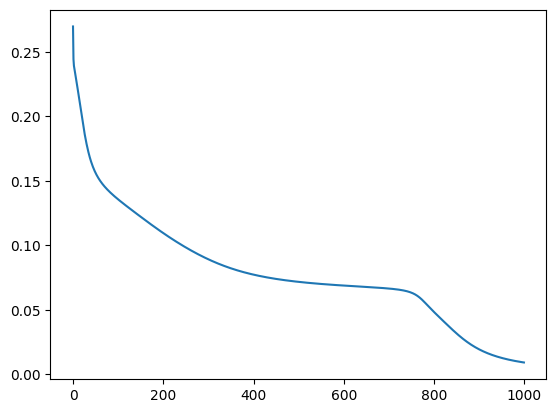

In [52]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Caricamento del dataset Monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# Lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# Definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # Numero di input features
hidden_size = 10                # Numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # Numero di classi nell'output
learning_rate = 0.45             # Tasso di apprendimento
epochs = 10000                   # Numero di epoche di allenamento
loss_function = "mse"  # Funzione di perdita selezionata

# Inizializzazione dei pesi e dei bias
np.random.seed(42)  # Per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # Pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # Bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # Pesi strato output
b2 = np.zeros((1, output_size))  # Bias strato output

# Funzione di attivazione sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivata della funzione sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Propagazione in avanti (Forward Propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # Calcolo pre-attivazione strato nascosto
    A1 = sigmoid(Z1)         # Applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # Calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # Applicazione funzione di attivazione
    return Z1, A1, Z2, A2

# Funzione di perdita Binary Crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # Numero di esempi nel batch
    epsilon = 1e-8  # Piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# Funzione di perdita Mean Squared Error (MSE)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)
    loss_history.append(loss)  # Salvataggio della perdita per analisi successive
    return loss

# Propagazione all'indietro (Backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # Dichiarazione delle variabili globali
    
    m = X.shape[0]  # Numero di campioni nel batch
    
    # Calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # Derivata della loss rispetto all'output (cross-entropy)
    else:  # Mean Squared Error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # Derivata della MSE rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # Gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # Gradiente del bias output
    
    # Backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)  # Derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # Gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # Gradiente del bias strato nascosto
    
    # Aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Allenamento della rete neurale
for epoch in range(epochs):
    Z1, A1, Z2, A2 = forward_propagation(X_train)  # Forward propagation
    backward_propagation(X_train, y_train, Z1, A1, Z2, A2)  # Backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # Ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, A2)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # Conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # Calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

# Visualizzazione della curva di perdita
pd.Series(loss_history).plot()


Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.7038
Epoch 10, Loss: 0.6024
Epoch 20, Loss: 0.4805
Epoch 30, Loss: 0.4054
Epoch 40, Loss: 0.3565
Epoch 50, Loss: 0.3182
Epoch 60, Loss: 0.2870
Epoch 70, Loss: 0.2580
Epoch 80, Loss: 0.2342
Epoch 90, Loss: 0.2124
Epoch 100, Loss: 0.1934
Epoch 110, Loss: 0.1769
Epoch 120, Loss: 0.1618
Epoch 130, Loss: 0.1476
Epoch 140, Loss: 0.1345
Epoch 150, Loss: 0.1227
Epoch 160, Loss: 0.1113
Epoch 170, Loss: 0.1023
Epoch 180, Loss: 0.0928
Epoch 190, Loss: 0.0848
Epoch 200, Loss: 0.0778
Epoch 210, Loss: 0.0710
Epoch 220, Loss: 0.0651
Epoch 230, Loss: 0.0605
Epoch 240, Loss: 0.0552
Epoch 250, Loss: 0.0512
Epoch 260, Loss: 0.0475
Epoch 270, Loss: 0.0442
Epoch 280, Loss: 0.0411
Epoch 290, Loss: 0.0383
Epoch 300, Loss: 0.0359
Epoch 310, Loss: 0.0337
Epoch 320, Loss: 0.0315
Epoch 330, Loss: 0.0297
Epoch 340, Loss: 0.0279
Epoch 350, Loss: 0.0264
Epoch 360, Loss: 

<Axes: >

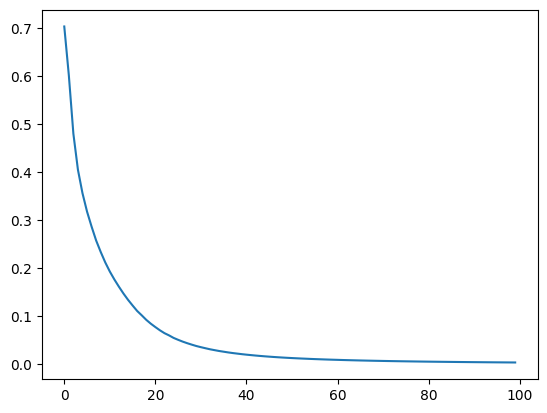

In [67]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# caricamento del dataset monks con one-hot encoding per le etichette
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)

# lista per memorizzare la storia della perdita durante l'allenamento
loss_history = []

# definizione dell'architettura della rete neurale
input_size = X_train.shape[1]   # numero di input features
hidden_size = 10                # numero di neuroni nello strato nascosto
output_size = y_train.shape[1]  # numero di classi nell'output
learning_rate = 0.1             # tasso di apprendimento
epochs = 1000                   # numero di epoche di allenamento
batch_size = 32                 # dimensione del batch
loss_function = "binary_crossentropy"  # funzione di perdita selezionata
activation_function = "relu"  # funzione di attivazione selezionata

# inizializzazione dei pesi e dei bias
np.random.seed(42)  # per la riproducibilità dei risultati
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)  # pesi strato nascosto
b1 = np.zeros((1, hidden_size))  # bias strato nascosto
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)  # pesi strato output
b2 = np.zeros((1, output_size))  # bias strato output

# definizione delle funzioni di attivazione e delle loro derivate
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# propagazione in avanti (forward propagation)
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1  # calcolo pre-attivazione strato nascosto
    A1 = activation(Z1)      # applicazione funzione di attivazione
    Z2 = np.dot(A1, W2) + b2  # calcolo pre-attivazione strato output
    A2 = sigmoid(Z2)         # funzione di attivazione finale (sigmoide per classificazione binaria)
    return Z1, A1, Z2, A2

# funzione di perdita binary crossentropy
def binary_crossentropy_loss(y_true, y_pred):
    m = y_true.shape[0]  # numero di esempi nel batch
    epsilon = 1e-8  # piccolo valore per evitare divisioni per zero
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # evita log(0)
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m

# funzione di perdita mean squared error (mse)
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# selezione della funzione di perdita
def compute_loss(y_true, y_pred):
    loss = binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_pred, y_true)
    loss_history.append(loss)  # salvataggio della perdita per analisi successive
    return loss

# propagazione all'indietro (backpropagation)
def backward_propagation(X, y, Z1, A1, Z2, A2):
    global W1, b1, W2, b2  # dichiarazione delle variabili globali
    
    m = X.shape[0]  # numero di campioni nel batch
    
    # calcolo dell'errore dell'output in base alla funzione di perdita scelta
    if loss_function == "binary_crossentropy":
        dZ2 = A2 - y  # derivata della loss rispetto all'output (cross-entropy)
    else:  # mean squared error
        dZ2 = (A2 - y) * sigmoid_derivative(A2)  # derivata della mse rispetto all'output
    
    dW2 = (1/m) * np.dot(A1.T, dZ2)  # gradiente dei pesi dello strato output
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)  # gradiente del bias output
    
    # backpropagation attraverso lo strato nascosto
    dZ1 = np.dot(dZ2, W2.T) * activation_derivative(A1)  # derivata rispetto all'input dello strato nascosto
    dW1 = (1/m) * np.dot(X.T, dZ1)  # gradiente dei pesi dello strato nascosto
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)  # gradiente del bias strato nascosto
    
    # aggiornamento dei pesi e dei bias
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# allenamento della rete neurale con mini-batch gradient descent
for epoch in range(epochs):
    # shuffle dei dati per evitare overfitting
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z1, A1, Z2, A2 = forward_propagation(X_batch)  # forward propagation
        backward_propagation(X_batch, y_batch, Z1, A1, Z2, A2)  # backpropagation e aggiornamento pesi
    
    if epoch % 10 == 0:  # ogni 10 epoche calcola la perdita
        loss = compute_loss(y_train, forward_propagation(X_train)[-1])
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# valutazione sul set di test
_, _, _, A2_test = forward_propagation(X_test)
predictions = (A2_test > 0.5).astype(int)  # conversione delle probabilità in classi binarie
accuracy = np.mean(predictions == y_test)  # calcolo dell'accuratezza
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()

Using cached ../datasets/monks/monk-1-train.csv
Using cached ../datasets/monks/monk-1-test.csv
One-hot encoding MONK-1 dataset...
Epoch 0, Loss: 0.2785
Epoch 10, Loss: 0.2361
Epoch 20, Loss: 0.2201
Epoch 30, Loss: 0.2002
Epoch 40, Loss: 0.1771
Epoch 50, Loss: 0.1451
Epoch 60, Loss: 0.1080
Epoch 70, Loss: 0.0789
Epoch 80, Loss: 0.0589
Epoch 90, Loss: 0.0446
Epoch 100, Loss: 0.0337
Epoch 110, Loss: 0.0244
Epoch 120, Loss: 0.0177
Epoch 130, Loss: 0.0128
Epoch 140, Loss: 0.0094
Epoch 150, Loss: 0.0069
Epoch 160, Loss: 0.0051
Epoch 170, Loss: 0.0038
Epoch 180, Loss: 0.0028
Epoch 190, Loss: 0.0022
Epoch 200, Loss: 0.0017
Epoch 210, Loss: 0.0013
Epoch 220, Loss: 0.0010
Epoch 230, Loss: 0.0008
Epoch 240, Loss: 0.0007
Epoch 250, Loss: 0.0006
Epoch 260, Loss: 0.0005
Epoch 270, Loss: 0.0004
Epoch 280, Loss: 0.0003
Epoch 290, Loss: 0.0003
Epoch 300, Loss: 0.0003
Epoch 310, Loss: 0.0002
Epoch 320, Loss: 0.0002
Epoch 330, Loss: 0.0002
Epoch 340, Loss: 0.0001
Epoch 350, Loss: 0.0001
Epoch 360, Loss: 

<Axes: >

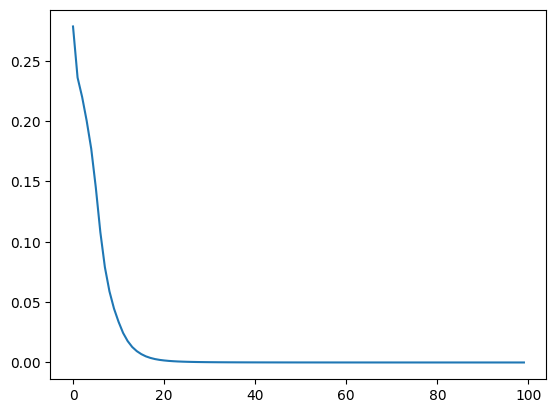

In [73]:
import numpy as np
import pandas as pd
from lib.data_loader import get_monks_dataset

# Parametri
hidden_layers = [10, 8]  # Lista che specifica il numero di neuroni per ogni hidden layer
learning_rate = 0.05
epochs = 1000
batch_size = 32
loss_function = "mse"
activation_function = "relu"

# Caricamento dataset
X_train, y_train, X_test, y_test = get_monks_dataset(1, one_hot_encode=True)
input_size = X_train.shape[1]
output_size = y_train.shape[1]

# Inizializzazione pesi e bias
np.random.seed(42)
layers = [input_size] + hidden_layers + [output_size]
W = [np.random.randn(layers[i], layers[i+1]) * np.sqrt(2 / layers[i]) for i in range(len(layers) - 1)]
b = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]

# Funzioni di attivazione
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def activation(x):
    return sigmoid(x) if activation_function == "sigmoid" else relu(x)

def activation_derivative(x):
    return sigmoid_derivative(x) if activation_function == "sigmoid" else relu_derivative(x)

# Forward propagation
def forward_propagation(X):
    A = [X]
    Z = []
    for i in range(len(W) - 1):
        Z.append(np.dot(A[-1], W[i]) + b[i])
        A.append(activation(Z[-1]))
    
    Z.append(np.dot(A[-1], W[-1]) + b[-1])
    A.append(sigmoid(Z[-1]))  # Output layer usa sigmoide
    return Z, A

# Funzione di perdita
def binary_crossentropy_loss(y_true, y_pred):
    epsilon = 1e-8
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_loss(y_true, y_pred):
    return binary_crossentropy_loss(y_true, y_pred) if loss_function == "binary_crossentropy" else mse_loss(y_true, y_pred)

# Backward propagation
def backward_propagation(X, y, Z, A):
    global W, b
    m = X.shape[0]
    dZ = A[-1] - y  # Output layer
    
    dW = [np.dot(A[-2].T, dZ) / m]
    db = [np.sum(dZ, axis=0, keepdims=True) / m]
    
    for i in range(len(W) - 2, -1, -1):
        dZ = np.dot(dZ, W[i+1].T) * activation_derivative(A[i+1])
        dW.insert(0, np.dot(A[i].T, dZ) / m)
        db.insert(0, np.sum(dZ, axis=0, keepdims=True) / m)
    
    for i in range(len(W)):
        W[i] -= learning_rate * dW[i]
        b[i] -= learning_rate * db[i]

# Training
loss_history = []
for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[permutation]
    y_train_shuffled = y_train[permutation]
    
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]
        
        Z, A = forward_propagation(X_batch)
        backward_propagation(X_batch, y_batch, Z, A)
    
    if epoch % 10 == 0:
        loss = compute_loss(y_train, forward_propagation(X_train)[1][-1])
        loss_history.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Test
_, A_test = forward_propagation(X_test)
predictions = (A_test[-1] > 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

pd.Series(loss_history).plot()